### Step 3 - Principal Component Analysis

#### This Python notebook will demonstrate how to use Principal Component Analysis (PCA)

#### PCA is a statistical methods for reducing the dimensionality of datasets, but at the same time minimizing information loss. It does so by creating new uncorrelated variables that successively maximize variance

#### The dataset used for PCA in this example is the mouse_zebra.csv file generated in Step 2

In [125]:
# Module importing

import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [95]:
# Dataframe loading from the downloaded mouse_zebra.csv file from Step 2.
# Brain region: cerebellum; species: mouse and zebrafish; cell: principal.

df = pd.read_csv('mouse_zebra.csv')
df.shape

(292, 61)

In [98]:
# In order to do PCA it is necessary to drop out all columns that do not contain numerical data
# and which are not important for the PCA of neuron morphology.
# However we will need to return one of these columns at the end as it will be used for classification purposes.
# In our example we will return the column 'Species'.
# Parameter 'Soma surface' is also being dropped out as it contain NaN values which can not be present for PCA

df_pca = df.drop(columns=['Neuron Name', 'Archive', 'Note', 'Age Scale', 'Gender',
       'Age Classification', 'Brain Region', 'Cell Type', 'Species', 'Strain',
       'Scientific Name', 'Stain', 'Experiment Condition', 'Protocol',
       'Slicing Direction', 'Reconstruction Software', 'Objective Type',
       'Original Format', 'Domain', 'Attributes', 'Magnification', 'Upload Date',
       'Deposition Date', 'Shrinkage Reported', 'Shrinkage Corrected',
       'Reported Value', 'Reported XY', 'Reported Z', 'Corrected Value',
       'Corrected XY', 'Corrected Z', 'Slicing Thickness', 'Min Age', 'Max Age',
       'Min Weight', 'Max Weight', 'Png URL', 'Reference PMID', 'Reference DOI',
       'Physical Integrity', 'Soma surface'])

In [99]:
features = df_pca.columns
features

Index(['Surface', 'Volume', 'Number of stems', 'Number of bifurcations',
       'Number of branches', 'Width', 'Height', 'Depth', 'Diameter',
       'Euclidian distance', 'Path distance', 'Branching order', 'Contraction',
       'Fragmentation', 'Partition asymmetry', 'Pk classic',
       'Bifurcation angle local', 'Fractal dimension',
       'Bifurcation angle remote', 'Length'],
      dtype='object')

In [100]:
# The first step is to get normal distribution of our morphometric data 
# Such that it will scale the distribution to a mean of zero and a standard deviation of one

In [104]:
x = df_pca.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features
x.shape

(292, 20)

In [105]:
np.mean(x),np.std(x)

(3.1572917796189384e-16, 1.0)

In [106]:
# Conversion into a tabular format with the help of DataFrame

In [107]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]

In [68]:
normalised_df = pd.DataFrame(x,columns=feat_cols)

In [108]:
# Showing first 5 cells

normalised_df.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19
0,0.016212,-0.220404,0.749331,3.035230,3.036843,0.209477,0.366857,4.951698,-0.546187,0.507090,0.192559,0.860369,-1.191037,5.734934,0.233628,-0.091681,-2.938442,0.557139,-1.677174,0.940254
1,0.010727,-0.221620,0.749331,3.216803,3.218410,0.130997,0.313484,3.014221,-0.546187,0.429402,0.126076,0.600970,-0.737850,5.900745,-0.438158,-0.091681,-3.112968,-0.096150,-1.606982,0.918765
2,0.180876,-0.183877,0.749331,4.239347,4.240918,0.316100,0.627326,3.092939,-0.546187,0.606447,0.249860,1.314317,-0.711666,9.457424,-0.012065,-0.091681,-3.069833,0.004112,-1.954616,1.585466
3,0.185536,-0.182843,-1.334523,3.952652,3.949456,0.470013,0.501244,3.591486,-0.546187,0.705478,0.294664,0.406421,-0.982655,9.379414,-0.470121,-0.091681,-3.418385,-0.078842,-2.041885,1.603725
4,2.858153,2.527182,-1.334523,0.789457,0.786370,2.836732,3.848913,-1.150214,1.957167,2.357746,1.976859,0.276722,1.296429,0.261638,0.111710,-0.091681,-1.495723,-1.762617,-1.775024,2.726522


In [109]:
# Showing last 5 cells

normalised_df.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19
287,0.177399,-0.184648,0.749331,4.468702,4.470266,0.770546,0.623904,-0.452756,-0.546187,0.715823,0.201822,1.444016,0.633742,1.915772,-0.057629,-0.091681,-0.804385,-1.125793,-1.132388,1.571844
288,0.270823,-0.163924,-1.334523,3.522611,3.519429,1.358194,0.616400,-0.345259,-0.546187,0.839707,0.440585,2.157363,0.012926,2.409840,0.158794,-0.091681,-0.912913,-0.702791,-1.466943,1.937912
289,0.030026,-0.217339,-1.334523,1.410628,1.407520,0.556976,0.621092,-0.193748,-0.546187,0.489529,0.149275,0.471271,0.198143,0.994327,0.318293,-0.091681,-0.991859,-0.973816,-1.658294,0.994383
290,0.126263,-0.195991,0.749331,4.564267,4.565828,0.797304,0.517105,0.011088,-0.546187,0.591030,0.227728,1.638565,0.720040,1.633098,-0.093430,-0.091681,-0.904196,-1.149645,-1.327060,1.371477
291,0.127566,-0.195702,-1.334523,3.216803,3.213632,0.992163,0.272787,0.437688,-0.546187,0.549537,0.366713,2.676160,0.068599,1.584456,-0.085908,-0.091681,-0.803368,-0.734452,-1.275366,1.376578


In [112]:
# Plotting to see the number of components we should use in our analysis.
# Choosing a number of components that "captures" at least 95% of the variance. 
# The number of components is less than 2.5 judging by the graph (see bellow).

Text(0, 0.5, 'cumulative explained variance')

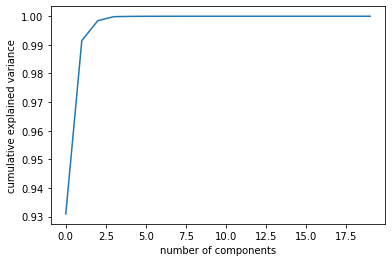

In [111]:
pca = PCA().fit(df_pca)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [116]:
# The number of new components-variables (n_components=2).
# We have chose 2 since the graph above has shown us that the number of components is less than 2.5.
# The computers calculates which variables will go to the 1st or 2nd component.

In [117]:
pca_df = PCA(n_components=2)
principalComponents_neurons = pca_df.fit_transform(x)

In [118]:
principal_neurons_df = pd.DataFrame(data = principalComponents_neurons
             , columns = ['principal component 1', 'principal component 2'])

In [119]:
principal_neurons_df.tail()

,principal component 1,principal component 2
287,4.538138,-2.947522
288,4.598595,-1.962442
289,2.373008,-1.218791
290,4.466847,-3.170783
291,3.791607,-2.098298


In [120]:
# Next step shows how much information is contained in PC1 and PC2.
# PC1 holds 46% of information and PC2 just 20%. 
# About 34% of information was lost when we projected our 20 morphometric data to 2 features

In [121]:
print('Explained variation per principal component: {}'.format(pca_df.explained_variance_ratio_))

Explained variation per principal component: [0.45873017 0.19956998]


In [122]:
# In the next step we have to return the column 'Species'.
# It had to be eliminated in the start because of the PCA analysis.

In [123]:
principal_neurons_df['Species'] = df['Species'].astype(str)

In [124]:
principal_neurons_df.tail()

,principal component 1,principal component 2,Species
287,4.538138,-2.947522,mouse
288,4.598595,-1.962442,mouse
289,2.373008,-1.218791,mouse
290,4.466847,-3.170783,mouse
291,3.791607,-2.098298,mouse


In [ ]:
# This is the final step in which we plot the PCA results

<Figure size 432x288 with 0 Axes>

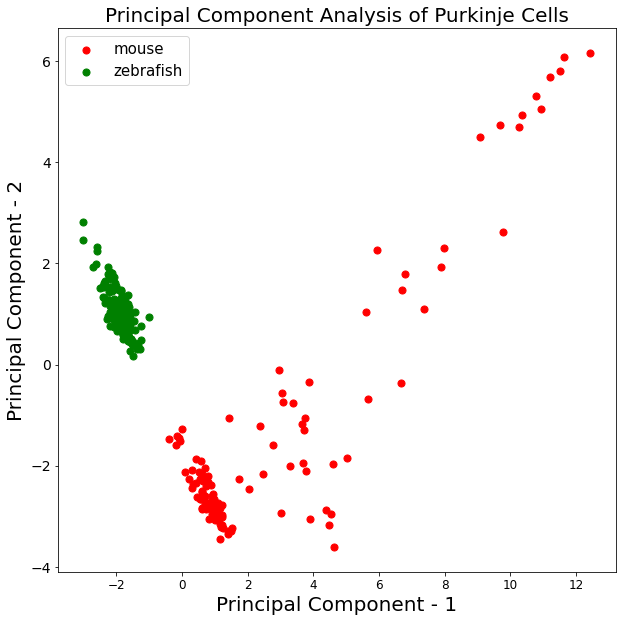

In [126]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Purkinje Cells",fontsize=20)
targets = ['mouse', 'zebrafish']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = principal_neurons_df['Species'] == target
    plt.scatter(principal_neurons_df.loc[indicesToKeep, 'principal component 1']
               , principal_neurons_df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

In [ ]:
# The last step will show us how component reduction was done.
# This is actually a correlation between morphometric parameters and PCAs.
# It shows us the influence of these parameters on PCA.

In [143]:
pca_df.components_

array([[ 0.28896509,  0.27151515, -0.03855549,  0.242657  ,  0.24256022,
         0.28420207,  0.28299275, -0.15417894,  0.23650189,  0.28480013,
         0.26970253,  0.22382904,  0.21460242,  0.12949276, -0.02098798,
        -0.0101712 , -0.17347252, -0.26134077, -0.16872088,  0.29805924],
       [ 0.22929127,  0.21300902, -0.17728999, -0.21114625, -0.21154547,
         0.23272715,  0.2333726 ,  0.1601905 , -0.04255564,  0.23336469,
         0.25781486, -0.27717551, -0.28265143, -0.10036982,  0.07695272,
        -0.08105652,  0.36288058,  0.21945323,  0.3606177 ,  0.18732652]])

<AxesSubplot:>

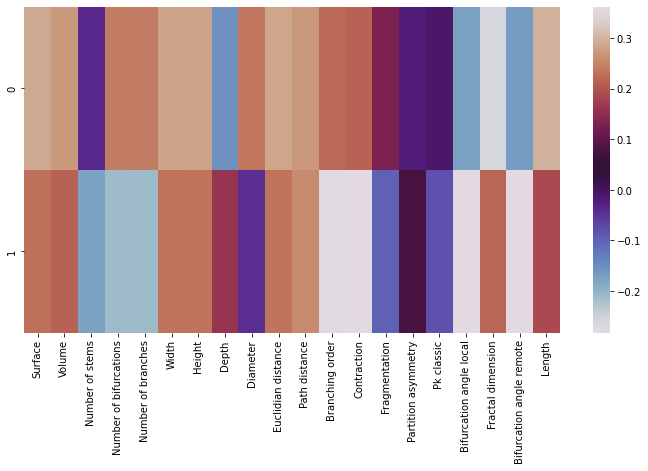

In [147]:
# The features variable was defined in the begining of this .ipynb

map= pd.DataFrame(pca_df.components_, columns=features)
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='twilight')